In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"herutriana","key":"88107ea2353190c212bc946f7b23c91f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

 98% 770M/786M [00:07<00:00, 151MB/s]
100% 786M/786M [00:07<00:00, 103MB/s]


In [5]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import zipfile,os
zip_lcl = '/content/skin-cancer9-classesisic.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()

In [7]:
dirbase = '/tmp/Skin cancer ISIC The International Skin Imaging Collaboration'
dir_latih = os.path.join(dirbase, 'Train')
dir_valid = os.path.join(dirbase, 'Test')

In [8]:
os.listdir('/tmp/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

['basal cell carcinoma',
 'dermatofibroma',
 'pigmented benign keratosis',
 'vascular lesion',
 'squamous cell carcinoma',
 'seborrheic keratosis',
 'actinic keratosis',
 'nevus',
 'melanoma']

In [9]:
os.listdir('/tmp/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

['basal cell carcinoma',
 'dermatofibroma',
 'pigmented benign keratosis',
 'vascular lesion',
 'squamous cell carcinoma',
 'seborrheic keratosis',
 'actinic keratosis',
 'nevus',
 'melanoma']

In [10]:
dir = os.path.join(dirbase,'rockpaperscissors/rps-cv-images')

In [11]:
latih_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.6,
    shear_range=0.1,
    fill_mode='nearest')
valid_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.99,
    shear_range=0.1,
    fill_mode='nearest')

In [12]:
generator_latih = latih_generator.flow_from_directory(
    directory=dir_latih,
    target_size=(180,180),
    batch_size=10,
    subset='training',
    class_mode='categorical')
generator_valid = valid_generator.flow_from_directory(
    directory=dir_valid,
    target_size=(180,180),
    batch_size=10,
    subset='validation',
    class_mode='categorical')

Found 899 images belonging to 9 classes.
Found 109 images belonging to 9 classes.


In [13]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512,activation='relu'),
  tensor.keras.layers.Dense(9,activation='softmax')
  ])

In [21]:
model.compile(loss='categorical_crossentropy',optimizer=tensor.optimizers.Adam(),
              metrics=[tensor.keras.metrics.Precision()])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_precision',mode='max',verbose=1,save_best_only=True)

In [23]:
history = model.fit(
    generator_latih,
    steps_per_epoch=10,
    epochs=100,
    validation_data=generator_valid,
    validation_steps=5,
    verbose=2,
    callbacks=[cekmodel])

Epoch 1/100

Epoch 1: val_precision improved from -inf to 0.00000, saving model to model.hdf5
10/10 - 16s - loss: 3.1056 - precision: 0.1500 - val_loss: 2.3333 - val_precision: 0.0000e+00 - 16s/epoch - 2s/step
Epoch 2/100

Epoch 2: val_precision did not improve from 0.00000
10/10 - 15s - loss: 2.1235 - precision: 0.0000e+00 - val_loss: 2.1926 - val_precision: 0.0000e+00 - 15s/epoch - 1s/step
Epoch 3/100

Epoch 3: val_precision did not improve from 0.00000
10/10 - 16s - loss: 2.0519 - precision: 0.0000e+00 - val_loss: 2.2104 - val_precision: 0.0000e+00 - 16s/epoch - 2s/step
Epoch 4/100

Epoch 4: val_precision did not improve from 0.00000
10/10 - 14s - loss: 2.0629 - precision: 0.0000e+00 - val_loss: 2.1911 - val_precision: 0.0000e+00 - 14s/epoch - 1s/step
Epoch 5/100

Epoch 5: val_precision did not improve from 0.00000
10/10 - 16s - loss: 2.0534 - precision: 0.0000e+00 - val_loss: 2.2001 - val_precision: 0.0000e+00 - 16s/epoch - 2s/step
Epoch 6/100

Epoch 6: val_precision did not improv

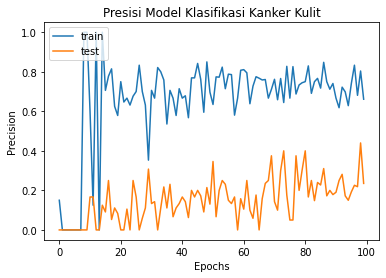

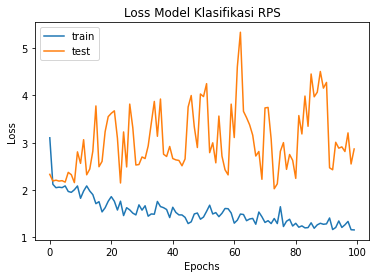

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Presisi Model Klasifikasi Kanker Kulit')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Klasifikasi RPS')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pengubah = tensor.lite.TFLiteConverter.from_keras_model(model)
tflite_model = pengubah.convert()

INFO:tensorflow:Assets written to: /tmp/tmpkl5hyqv1/assets


In [ ]:
with tensor.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save('model.pb') 
%cd

INFO:tensorflow:Assets written to: model.pb/assets


INFO:tensorflow:Assets written to: model.pb/assets


/root
